In [1]:
import heeps
from heeps.util.img_processing import get_radial_profile
from heeps.util.coord import mas2rms
from heeps.util.lamD import get_lamD_pix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
conf = heeps.config.read_config(**dict(hfov = 1.065, nframes_avg=1))
conf = heeps.config.update_config(**conf, verbose=True)
wf = heeps.pupil.pupil(**conf)
rim = conf['ndet'] // 2
x = np.arange(rim)/get_lamD_pix(**conf)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=1024, diam_norm=1.0838, beam_ratio=0.2568
   ravc_calc=False, ravc_t=0.7909, ravc_r=0.5190
   npupil=285, pscale=5.4700 mas, lam=3.8112E-06 m
   hfov=1.06 arcsec (-> ndet=389, 49.95 lam/D)



In [3]:
conf['mode'] = 'ELT'
psf = heeps.wavefront.propagate(wf, avg=True, onaxis=False, **conf)
off = get_radial_profile(psf, (rim,rim), 1)[:-1]
peak = np.max(off)
off /= peak

   2022-07-07 19:19:10, e2e simulation using 12 cores
   2022-07-07 19:19:11, completed in 1.0 seconds


   2022-07-07 19:19:12, e2e simulation using 12 cores
   2022-07-07 19:19:14, completed in 2.24 seconds
   2022-07-07 19:19:16, e2e simulation using 12 cores
   2022-07-07 19:19:18, completed in 2.24 seconds
   2022-07-07 19:19:19, e2e simulation using 12 cores
   2022-07-07 19:19:22, completed in 2.22 seconds
   2022-07-07 19:19:23, e2e simulation using 12 cores
   2022-07-07 19:19:25, completed in 2.25 seconds
   2022-07-07 19:19:27, e2e simulation using 12 cores
   2022-07-07 19:19:29, completed in 2.24 seconds


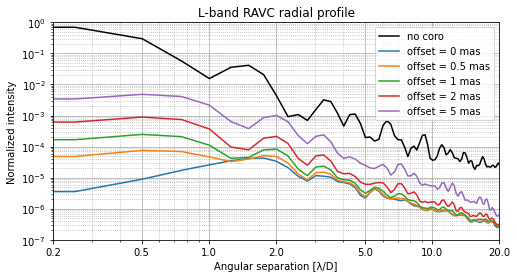

In [4]:
conf['mode'] = 'RAVC'
plt.figure(figsize=(8,4))
plt.plot(x, off, 'k', label='no coro')
for zern in [0, 0.5, 1, 2, 5]:
    if zern == 0:
        conf['zern'] = None
    else:
        conf['zern'] = [2, mas2rms(zern, conf['diam_ext'])]
    psf = heeps.wavefront.propagate(wf, avg=True, onaxis=True, **conf)
    on = get_radial_profile(psf, (rim,rim), 1)[:-1]
    on /= peak
    plt.plot(x, on, label='offset = %s mas'%zern)
plt.loglog()
plt.grid(True), plt.grid(which='minor', linestyle=':')
plt.legend()
plt.xlabel('Angular separation [\u03BB/D]')
plt.ylabel('Normalized intensity')
plt.title('L-band RAVC radial profile')
plt.xlim(0.2, 20)
plt.ylim(1e-7, 1e-0)
plt.xticks([0.2, 0.5, 1, 2, 5, 10, 20])
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())
plt.savefig('centroid_displacement.png', transparent=True, dpi=300)